# Технологии обработки больших данных

Занятие 2. Знакомство с PySpark 

1. Установка PySpark на локальной машине
2. Базовые классы DataFrame и RDD
3. Преобразования данных
4. Домашнее задание 


## 1. Установка PySpark на локальной машине

To run spark in Colab, we need to first install all the dependencies in Colab environment:
- Java 8 
- Apache Spark 3.2.1 with hadoop 3.2, 
- Findspark to locate the spark in the system. 

The tools installation can be carried out inside the Jupyter Notebook of the Colab.  
Follow the steps to install the dependencies:

In [1]:
! apt-get install openjdk-8-jdk-headless -qq > /dev/null

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


In [2]:
! wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz

^C


In [3]:
! tar xvf spark-3.2.1-bin-hadoop3.2.tgz > /dev/null


gzip: stdin: unexpected end of file
tar: Unexpected EOF in archive
tar: Unexpected EOF in archive
tar: Error is not recoverable: exiting now


In [4]:
! pip install -q findspark

You should consider upgrading via the '/home/user/ds/PycharmProjects/spark/venv/bin/python -m pip install --upgrade pip' command.


Now that you installed Spark and Java in Colab, it is time to set the environment path which enables you to run Pyspark in your Colab environment. Set the location of Java and Spark by running the following code:

In [1]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = os.getcwd() + "/spark-3.2.1-bin-hadoop3.2"

Run a local spark session to test your installation:

In [2]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

22/03/02 20:19:04 WARN Utils: Your hostname, calc resolves to a loopback address: 127.0.1.1; using 192.168.42.204 instead (on interface usb0)
22/03/02 20:19:04 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/03/02 20:19:05 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


![](img/spark_libs.png)

## Базовые классы DataFrame и RDD

All code snippets in Python, R or Scala generate identical Java bytecode.

PySpark’s primary abstraction is a distributed collection of items called a DataFrame.  
We call it DataFrame to be consistent with the data frame concept in Pandas and R.  

Let’s make a new DataFrame from the text of the README file in the sample_data directory:

In [7]:
textFile = spark.read.text('sample_data/README.md')
type(textFile)

pyspark.sql.dataframe.DataFrame

In [8]:
# Number of rows in this DataFrame
textFile.count()

19

In [9]:
# First rows in this DataFrame
textFile.show(10, truncate=False) 

+---------------------------------------------------------------------------------------------------+
|value                                                                                              |
+---------------------------------------------------------------------------------------------------+
|This directory includes a few sample datasets to get you started.                                  |
|                                                                                                   |
|*   `california_housing_data*.csv` is California housing data from the 1990 US                     |
|    Census; more information is available at:                                                      |
|    https://developers.google.com/machine-learning/crash-course/california-housing-data-description|
|                                                                                                   |
|*   `mnist_*.csv` is a small sample of the                                       

### json and sql demo

In [10]:
!head sample_data/anscombe.json 

[
  {"Series":"I", "X":10.0, "Y":8.04},
  {"Series":"I", "X":8.0, "Y":6.95},
  {"Series":"I", "X":13.0, "Y":7.58},
  {"Series":"I", "X":9.0, "Y":8.81},
  {"Series":"I", "X":11.0, "Y":8.33},
  {"Series":"I", "X":14.0, "Y":9.96},
  {"Series":"I", "X":6.0, "Y":7.24},
  {"Series":"I", "X":4.0, "Y":4.26},
  {"Series":"I", "X":12.0, "Y":10.84},


In [11]:
jsonFile = spark.read.json("sample_data/anscombe.json").createOrReplaceTempView("anscombe")

In [12]:
spark.sql("""SELECT Series, X, Y FROM anscombe WHERE Series = 'I' """).show(10)

+------+----+-----+
|Series|   X|    Y|
+------+----+-----+
|     I|10.0| 8.04|
|     I| 8.0| 6.95|
|     I|13.0| 7.58|
|     I| 9.0| 8.81|
|     I|11.0| 8.33|
|     I|14.0| 9.96|
|     I| 6.0| 7.24|
|     I| 4.0| 4.26|
|     I|12.0|10.84|
|     I| 7.0| 4.81|
+------+----+-----+
only showing top 10 rows



## 3. Преобразования данных  


Now let’s transform this DataFrame to a new one. We call filter to return a new DataFrame with a subset of the lines in the file.

In [13]:
linesWithCSV = textFile.filter(textFile.value.contains("csv"))

# How many lines contain "csv"?
linesWithCSV.count()

2

In [14]:
wordCounts = textFile.rdd.flatMap(lambda line: line.value.split(" "))\
                      .map(lambda word: (word, 1))\
                      .reduceByKey(lambda a, b: a + b)

Computations are lazy, do nothing while call `.show()`

In [15]:
wordCounts.toDF().show()

+--------------------+---+
|                  _1| _2|
+--------------------+---+
|                This|  1|
|           directory|  1|
|            includes|  1|
|                   a|  3|
|                 few|  1|
|              sample|  2|
|            datasets|  1|
|                  to|  1|
|                 get|  1|
|                 you|  1|
|            started.|  1|
|                    | 51|
|                   *|  3|
|`california_housi...|  1|
|                  is|  4|
|          California|  1|
|             housing|  1|
|                data|  1|
|                from|  1|
|                 the|  3|
+--------------------+---+
only showing top 20 rows



## Домашнее задание  

Повторить ДЗ 1 средствами PySpark. В решении достаточно использовать только map, функцию `white_filter` можно взять из первого ДЗ. 

## Optional: Cluster mode  

Cluster Manager Types  
The system currently supports several cluster managers:

* Standalone – a simple cluster manager included with Spark that makes it easy to set up a cluster.
* Apache Mesos – a general cluster manager that can also run Hadoop MapReduce and service applications. (Deprecated)
* Hadoop YARN – the resource manager in Hadoop 2.
* Kubernetes – an open-source system for automating deployment, scaling, and management of containerized applications.

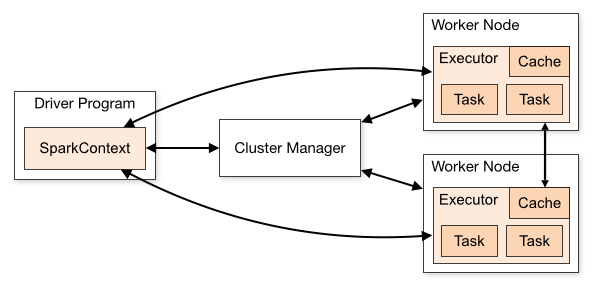